In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

13


<Figure size 432x288 with 0 Axes>

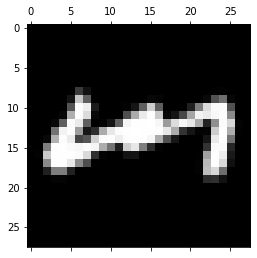

In [2]:
from extra_keras_datasets import emnist
import pylab as pl
(input_train, target_train), (input_test, target_test) = emnist.load_data(type='letters')
pl.gray()
i=6
pl.matshow(input_train[i])
print(target_train[i])
pl.show()

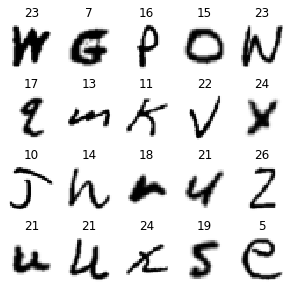

In [3]:
images_and_labels= list(zip(input_train,target_train))
plt.figure(figsize=(5,5))
for index, (image,label) in enumerate(images_and_labels[:20]):
    plt.subplot(4,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title(label)


In [4]:
print("Training: input=> {} target=>{}".format(input_train.shape,target_train.shape))
print("Testing : input=> {} target=>{}".format(input_test.shape,target_test.shape))

Training: input=> (124800, 28, 28) target=>(124800,)
Testing : input=> (20800, 28, 28) target=>(20800,)


In [5]:
import random
from sklearn import ensemble

#define variables
n_samples= len(input_train)
x= input_train.reshape((n_samples,-1))
y= target_train

# print(input_train.shape,x.shape,n_samples)

#create random indices
# sample_index= random.sample(list(range(len(x))),len(x)//5) # 20-80 split
# valid_index=[i for i in range(len(x)) if i not in sample_index]
# sample_images=[x[i] for i in sample_index]
# valid_images=[x[i] for i in valid_index]
# sample_target=[y[i] for i in sample_index]
# valid_target=[y[i] for i in valid_index]


classifier= ensemble.RandomForestClassifier()
classifier.fit(input_train.reshape((n_samples,-1)),target_train)

score= classifier.score(input_train.reshape((n_samples,-1)),target_train)
print("Score",score)


/home/nirmal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score 0.9969150641025641


<Figure size 432x288 with 0 Axes>

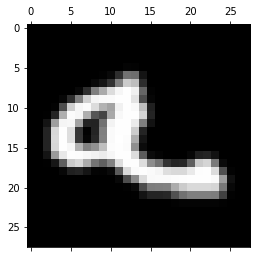

Prediction: 1     Actual: 1


In [6]:
k=random.randint(0,1000)
pl.gray()
pl.matshow(input_test[k])
pl.show()
# print("Prediction: {} Actual: {}".format(classifier.predict(x[k].reshape(1, -1))[0],target_test[k]))

print("Prediction: {}     Actual: {}".format(classifier.predict(input_test[k].reshape(1,-1))[0],target_test[k]))

In [9]:
import pickle
pickle.dump(classifier,open('final.model','wb'))